In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score






1. Import data

In [307]:
# Load the transaction data
df1 = pd.read_csv('transactions_dataset_final 1/transactions_dataset_final 1.csv')


In [308]:
df1.head(10)

,Transaction ID,Timestamp,Sender Account ID,Transaction Type,IN_OUT,Amount,Recipient Bank,Fraud
0,_RARE_,2023-11-13 15:09:26,10053,Debit,Out,112.68,B0005,0
1,_RARE_,2023-09-24 00:17:36,10002,Debit,Out,2644.18,B0007,0
2,_RARE_,2023-12-19 13:37:28,10069,Credit,In,1504.50,B00010,0
3,_RARE_,2023-06-17 07:13:38,10001,Credit,In,1605.28,B0001,0
4,_RARE_,2023-03-31 22:24:32,10049,Credit,In,1184.09,B0006,0
5,_RARE_,2023-05-27 03:59:11,10059,Credit,In,3605.49,B0003,0
6,_RARE_,2023-08-22 11:28:31,10040,Credit,In,2666.66,B0004,0
7,_RARE_,2023-08-10 14:59:52,10073,Debit,Out,1736.85,B00010,0
8,_RARE_,2023-08-20 07:36:40,10050,Credit,In,2780.88,B0001,0
9,_RARE_,2023-12-05 12:51:53,10081,Credit,In,1092.44,B0005,0


In [309]:
#load customer data
df2 = pd.read_csv('customer_dataset 1.csv')


In [310]:
df2.head(10)

,Customer ID,Name,Age,Location,Gender,Account Type,Device Count
0,10001,Nimal Fernando,61,Jaffna,Female,Savings,5
1,10002,Sunil Samarasinghe,60,Jaffna,Other,Current,3
2,10003,Ruwan Jayasinghe,67,Galle,Other,Savings,1
3,10004,Lakshan Perera,19,Anuradhapura,Female,Savings,5
4,10005,Ruwan Kumara,52,Ratnapura,Other,Current,4
5,10006,Sajith Weerasinghe,59,Batticaloa,Male,Fixed Deposit,3
6,10007,Amaya Hettiarachchi,56,Negombo,Female,Savings,5
7,10008,Chathura Kumara,37,Colombo,Other,Fixed Deposit,2
8,10009,Kamal Dias,56,Galle,Male,Current,3
9,10010,Amaya Dias,74,Ratnapura,Female,Savings,2


In [311]:
# Merge the datasets
merged_data = pd.merge(df1, df2, left_on='Sender Account ID', right_on='Customer ID')


In [312]:
merged_data.head()

,Transaction ID,Timestamp,Sender Account ID,Transaction Type,IN_OUT,Amount,Recipient Bank,Fraud,Customer ID,Name,Age,Location,Gender,Account Type,Device Count
0,_RARE_,2023-11-13 15:09:26,10053,Debit,Out,112.68,B0005,0,10053,Nadeeka Weerasinghe,43,Colombo,Male,Fixed Deposit,7
1,_RARE_,2023-09-24 00:17:36,10002,Debit,Out,2644.18,B0007,0,10002,Sunil Samarasinghe,60,Jaffna,Other,Current,3
2,_RARE_,2023-12-19 13:37:28,10069,Credit,In,1504.50,B00010,0,10069,Kamal De Alwis,58,Jaffna,Male,Fixed Deposit,5
3,_RARE_,2023-06-17 07:13:38,10001,Credit,In,1605.28,B0001,0,10001,Nimal Fernando,61,Jaffna,Female,Savings,5
4,_RARE_,2023-03-31 22:24:32,10049,Credit,In,1184.09,B0006,0,10049,Tharushi Kumara,19,Ratnapura,Other,Savings,4


In [313]:
# Display basic information
merged_data.info()
merged_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Transaction ID     100000 non-null  object 
 1   Timestamp          100000 non-null  object 
 2   Sender Account ID  100000 non-null  int64  
 3   Transaction Type   100000 non-null  object 
 4   IN_OUT             100000 non-null  object 
 5   Amount             100000 non-null  float64
 6   Recipient Bank     100000 non-null  object 
 7   Fraud              100000 non-null  int64  
 8   Customer ID        100000 non-null  int64  
 9   Name               100000 non-null  object 
 10  Age                100000 non-null  int64  
 11  Location           100000 non-null  object 
 12  Gender             100000 non-null  object 
 13  Account Type       100000 non-null  object 
 14  Device Count       100000 non-null  int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 11.

,Sender Account ID,Amount,Fraud,Customer ID,Age,Device Count
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,10050.745620,2504.115989,0.056740,10050.745620,50.930650,4.655400
std,28.931267,1442.489042,0.231346,28.931267,17.417098,2.791535
min,10001.000000,10.270000,0.000000,10001.000000,18.000000,1.000000
25%,10026.000000,1258.902500,0.000000,10026.000000,36.000000,3.000000
50%,10051.000000,2492.160000,0.000000,10051.000000,53.000000,4.000000
75%,10076.000000,3750.142500,0.000000,10076.000000,64.000000,5.000000
max,10100.000000,4999.740000,1.000000,10100.000000,80.000000,11.000000


2. Data Visualization

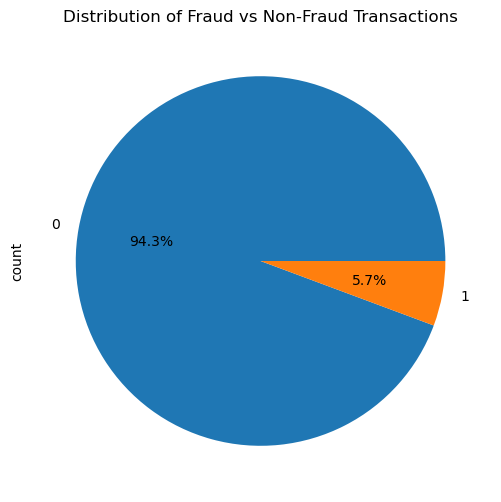

In [314]:
#Fraud Distribution
plt.figure(figsize=(8, 6))
df1['Fraud'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Fraud vs Non-Fraud Transactions')
plt.show()


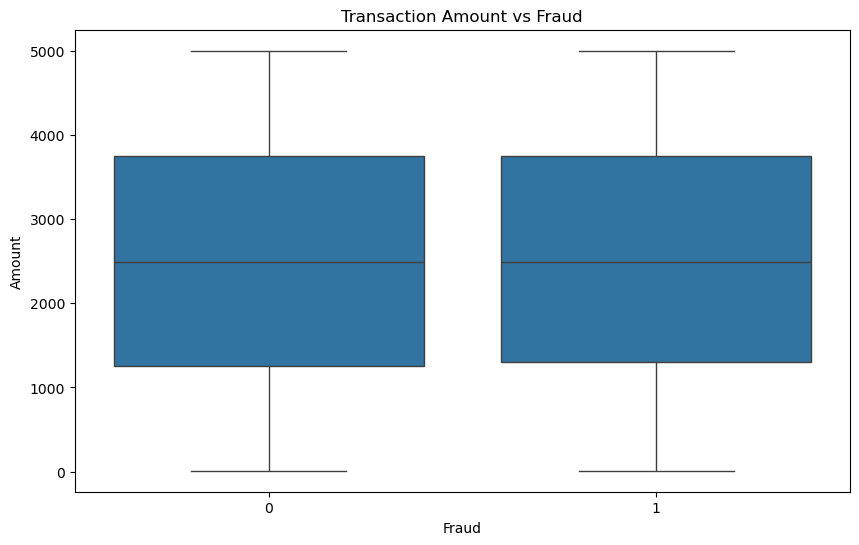

In [315]:
#Transaction Amount vs Fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fraud', y='Amount', data=df1)
plt.title('Transaction Amount vs Fraud')
plt.show()

In [316]:
# 1. Average transaction amount by age group
merged_data['Age Group'] = pd.cut(merged_data['Age'], bins=[0, 30, 50, 70, 100], labels=['0-30', '31-50', '51-70', '71+'])
avg_amount_by_age = merged_data.groupby('Age Group')['Amount'].mean().sort_values(ascending=False)
print("\nAverage Transaction Amount by Age Group:")
print(avg_amount_by_age)


Average Transaction Amount by Age Group:
Age Group
71+      2505.537929
51-70    2505.173103
0-30     2502.988948
31-50    2502.687518
Name: Amount, dtype: float64


/var/folders/rb/_7_snk4x0cj_bx_rd6bjkhxw0000gn/T/ipykernel_52623/2739314090.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_amount_by_age = merged_data.groupby('Age Group')['Amount'].mean().sort_values(ascending=False)


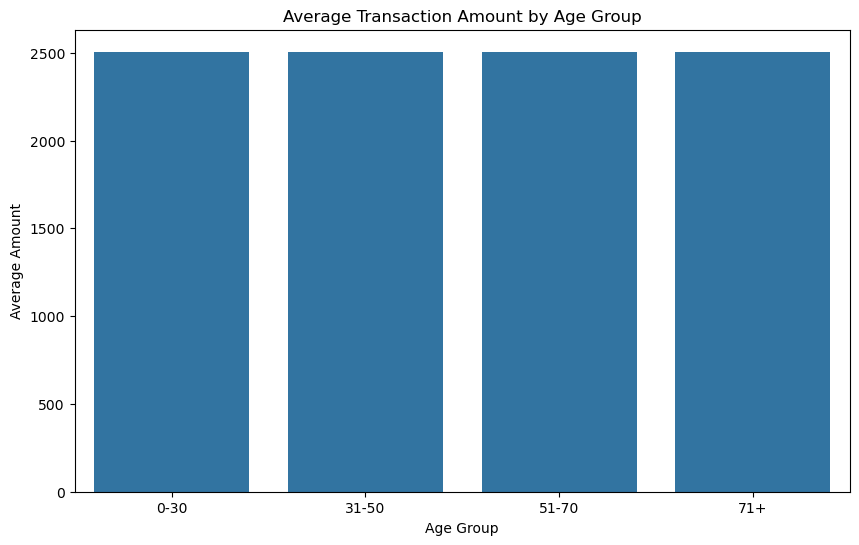

In [317]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_amount_by_age.index, y=avg_amount_by_age.values)
plt.title('Average Transaction Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Amount')
plt.show()

In [318]:
# 2. Fraud rate by account type and gender
fraud_rate = merged_data.groupby(['Account Type', 'Gender'])['Fraud'].mean().unstack()
print("\nFraud Rate by Account Type and Gender:")
print(fraud_rate)



Fraud Rate by Account Type and Gender:
Gender           Female      Male     Other
Account Type                               
Current        0.036744  0.074653  0.012143
Fixed Deposit  0.061742  0.079545  0.067246
Savings        0.106377  0.033072  0.016197


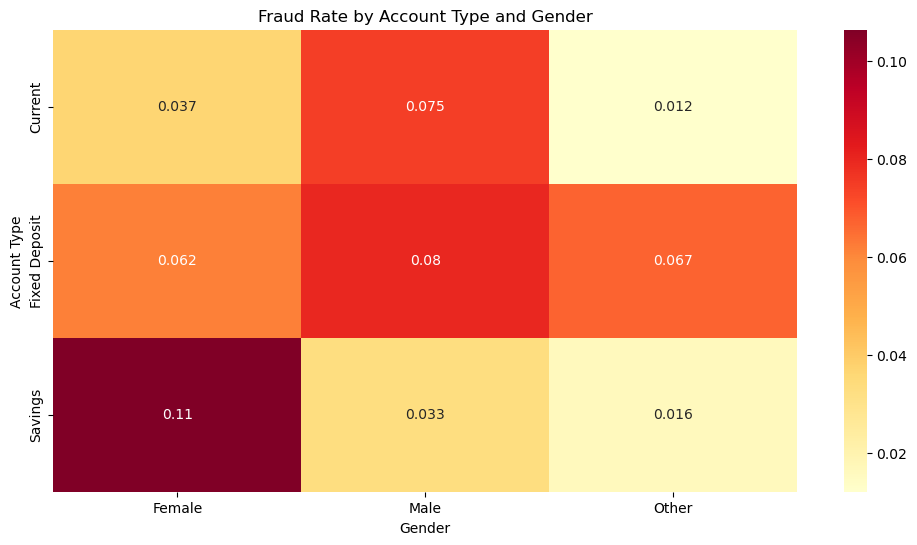

In [319]:
# Visualization
plt.figure(figsize=(12, 6))
sns.heatmap(fraud_rate, annot=True, cmap='YlOrRd')
plt.title('Fraud Rate by Account Type and Gender')
plt.show()


<Figure size 1500x800 with 0 Axes>

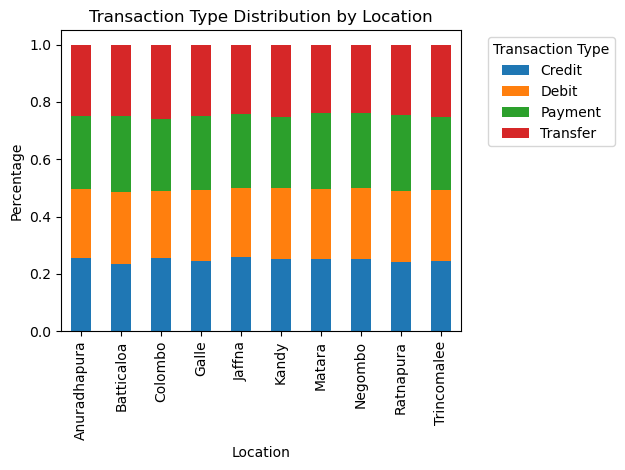

In [320]:
# 3. Transaction type distribution by location
trans_type_by_location = merged_data.groupby(['Location', 'Transaction Type']).size().unstack(fill_value=0)
trans_type_by_location_pct = trans_type_by_location.div(trans_type_by_location.sum(axis=1), axis=0)

plt.figure(figsize=(15, 8))
trans_type_by_location_pct.plot(kind='bar', stacked=True)
plt.title('Transaction Type Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Percentage')
plt.legend(title='Transaction Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [321]:
# Correlation of numeric features with fraud
numeric_features = ['Amount', 'Age', 'Device Count']
correlation_with_fraud = merged_data[numeric_features + ['Fraud']].corr()['Fraud'].sort_values(ascending=False)
print("\nCorrelation of numeric features with Fraud:")
print(correlation_with_fraud)



Correlation of numeric features with Fraud:
Fraud           1.000000
Amount          0.001253
Age            -0.019362
Device Count   -0.021442
Name: Fraud, dtype: float64


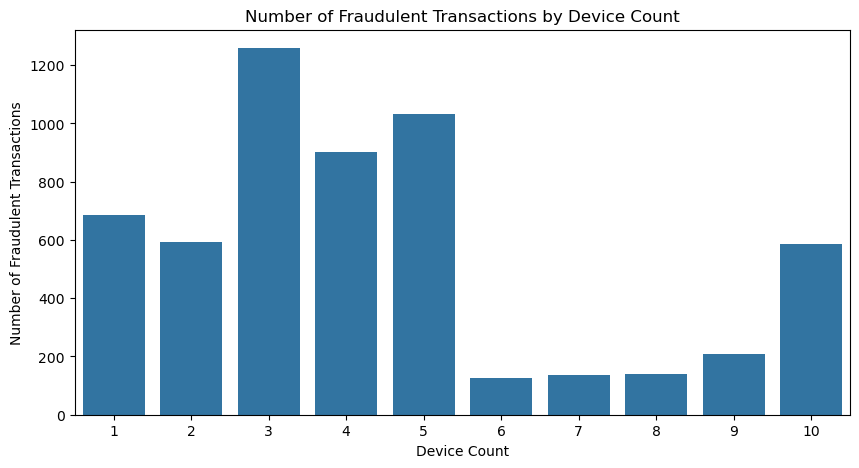

In [322]:
# Devices with fraud
fraud_by_device = merged_data[merged_data['Fraud'] == 1]['Device Count'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=fraud_by_device.index, y=fraud_by_device.values)
plt.title('Number of Fraudulent Transactions by Device Count')
plt.xlabel('Device Count')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

In [323]:
# Top 10 customers with fraud detection
fraud_transactions = df1[df1['Fraud'] == 1]
top_fraud_customers = fraud_transactions['Sender Account ID'].value_counts().head(10)
print("\nTop 10 Customers with Fraud Detection:")
print(top_fraud_customers)


Top 10 Customers with Fraud Detection:
Sender Account ID
10043    180
10080    175
10096    167
10078    164
10038    164
10045    164
10050    164
10089    163
10079    160
10062    159
Name: count, dtype: int64


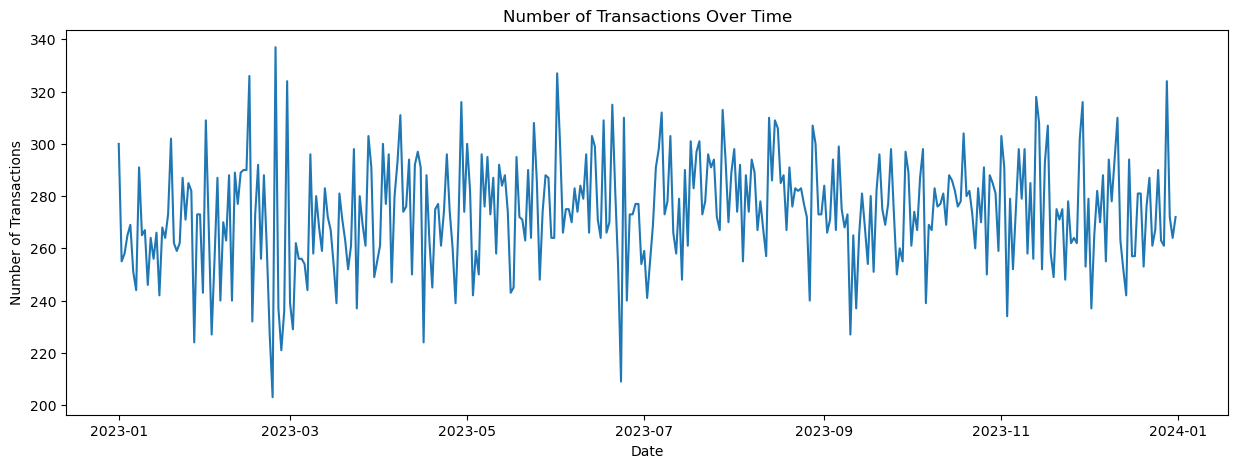

In [324]:
# Time series analysis of transactions
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
df1['Date'] = df1['Timestamp'].dt.date
daily_transactions = df1.groupby('Date').size()
plt.figure(figsize=(15, 5))
daily_transactions.plot()
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

In [325]:
df= merged_data

In [326]:
# Feature engineering
df['Transaction_Hour'] = pd.to_datetime(df['Timestamp']).dt.hour
df['Is_Weekend'] = pd.to_datetime(df['Timestamp']).dt.dayofweek.isin([5, 6]).astype(int)
df['Amount_Log'] = np.log1p(df['Amount'])

In [327]:
# Prepare dataset for correlation heatmap
df_encoded = df.copy()
le = LabelEncoder()


In [328]:
# Encode categorical variables
categorical_features = ['Transaction Type', 'IN_OUT', 'Recipient Bank', 'Account Type', 'Gender', 'Location']
for col in categorical_features:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [329]:
# Select features for correlation analysis
features_for_correlation = ['Amount', 'Age', 'Device Count', 'Transaction_Hour', 'Is_Weekend', 'Amount_Log',
                            'Transaction Type', 'IN_OUT', 'Recipient Bank', 'Account Type', 'Gender', 'Location', 'Fraud']


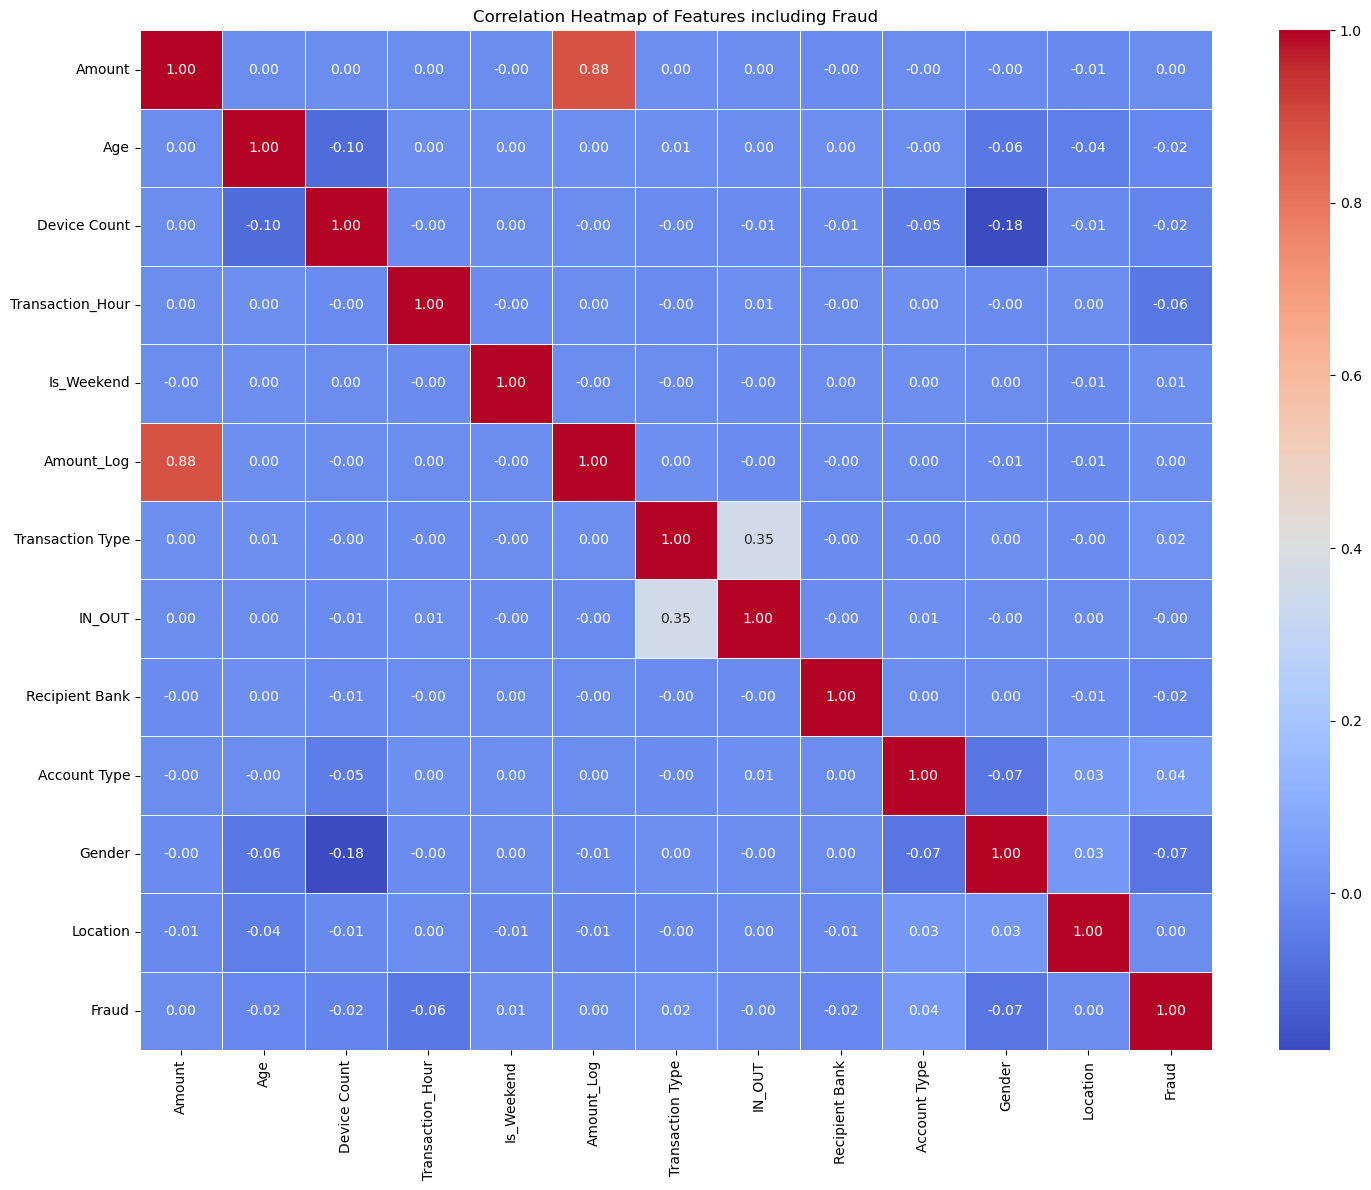

In [330]:
# Create correlation matrix
correlation_matrix = df_encoded[features_for_correlation].corr()

# Create correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features including Fraud')
plt.tight_layout()
plt.show()

Time series analysis

In [331]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set Timestamp as index
df.set_index('Timestamp', inplace=True)

# Sort the dataframe by timestamp
df.sort_index(inplace=True)

# Create a time series of daily fraud counts
daily_fraud = df.resample('D')['Fraud'].sum()


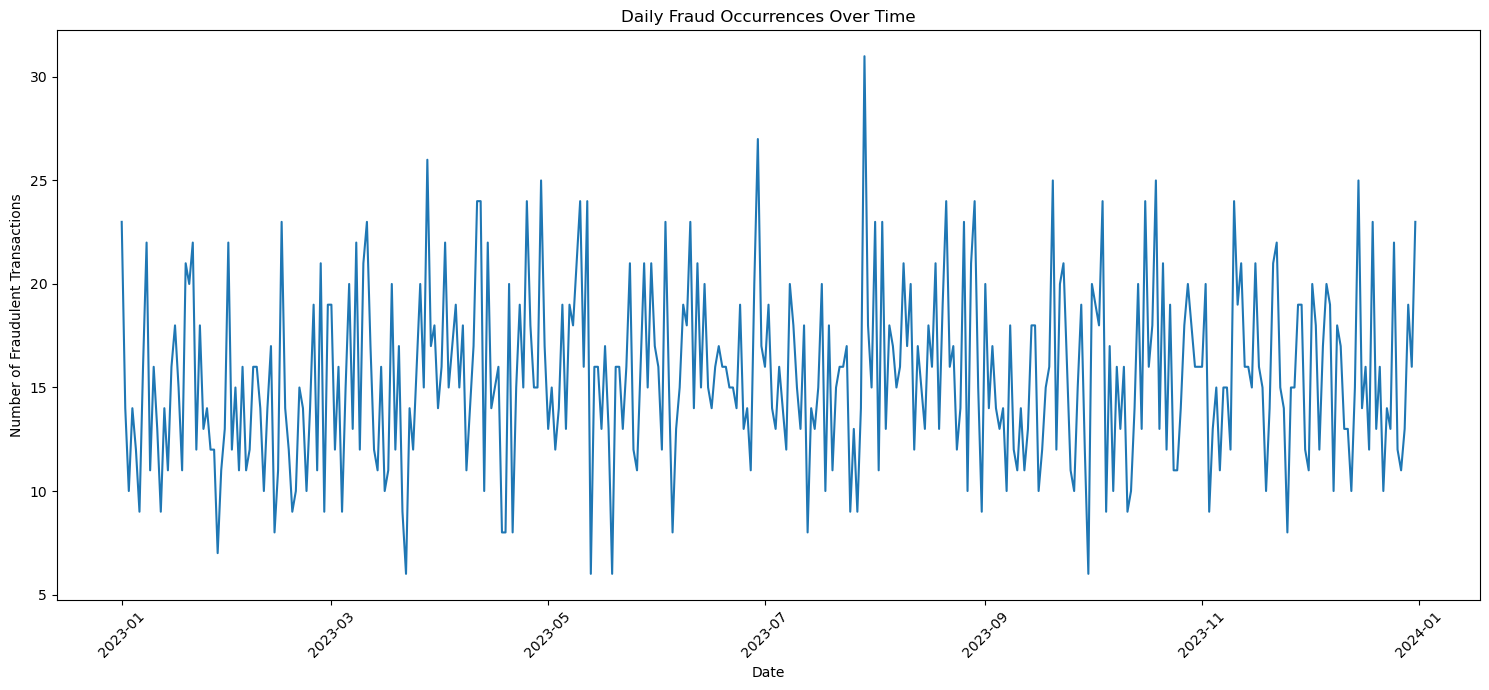

In [333]:
# Plot daily fraud occurrences
plt.figure(figsize=(15, 7))
plt.plot(daily_fraud.index, daily_fraud.values)
plt.title('Daily Fraud Occurrences Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


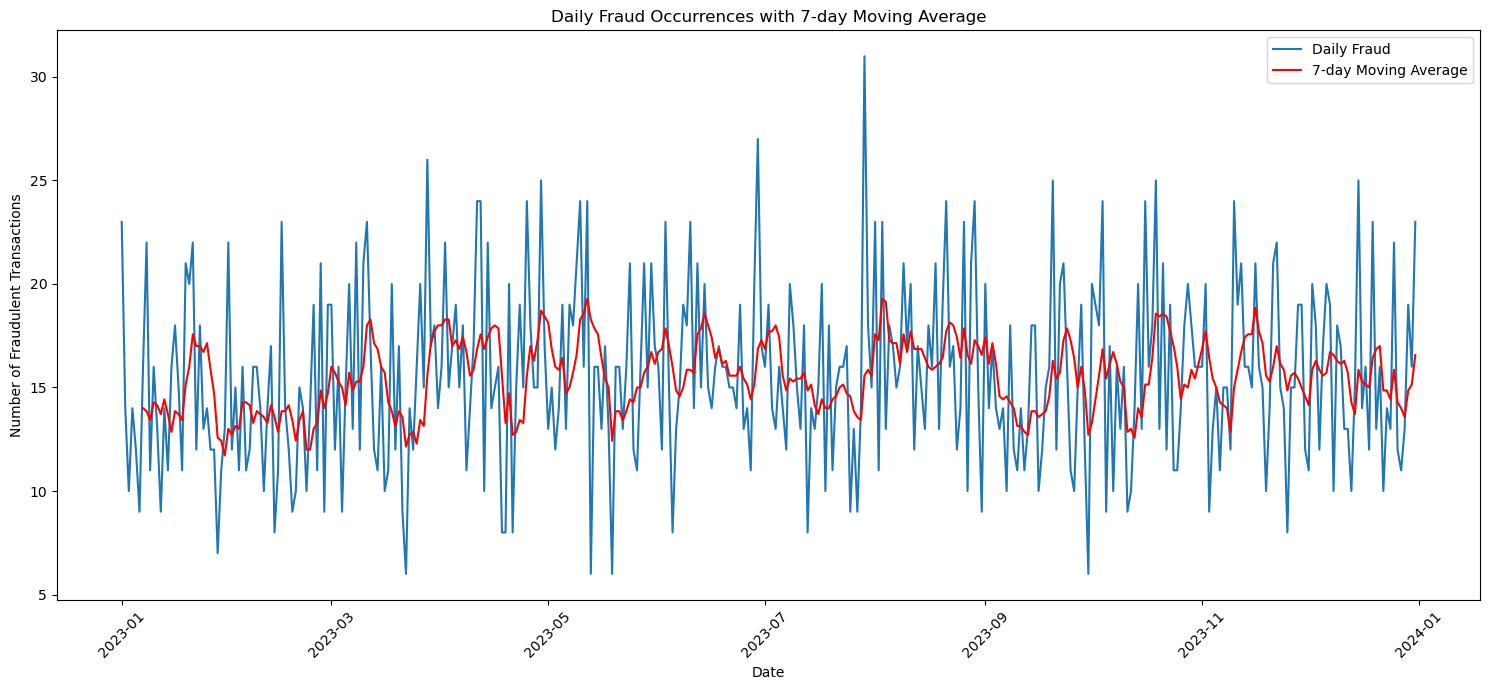

In [334]:
# Calculate 7-day moving average
ma_7 = daily_fraud.rolling(window=7).mean()

# Plot daily fraud occurrences with 7-day moving average
plt.figure(figsize=(15, 7))
plt.plot(daily_fraud.index, daily_fraud.values, label='Daily Fraud')
plt.plot(ma_7.index, ma_7.values, color='red', label='7-day Moving Average')
plt.title('Daily Fraud Occurrences with 7-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Fraudulent Transactions')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

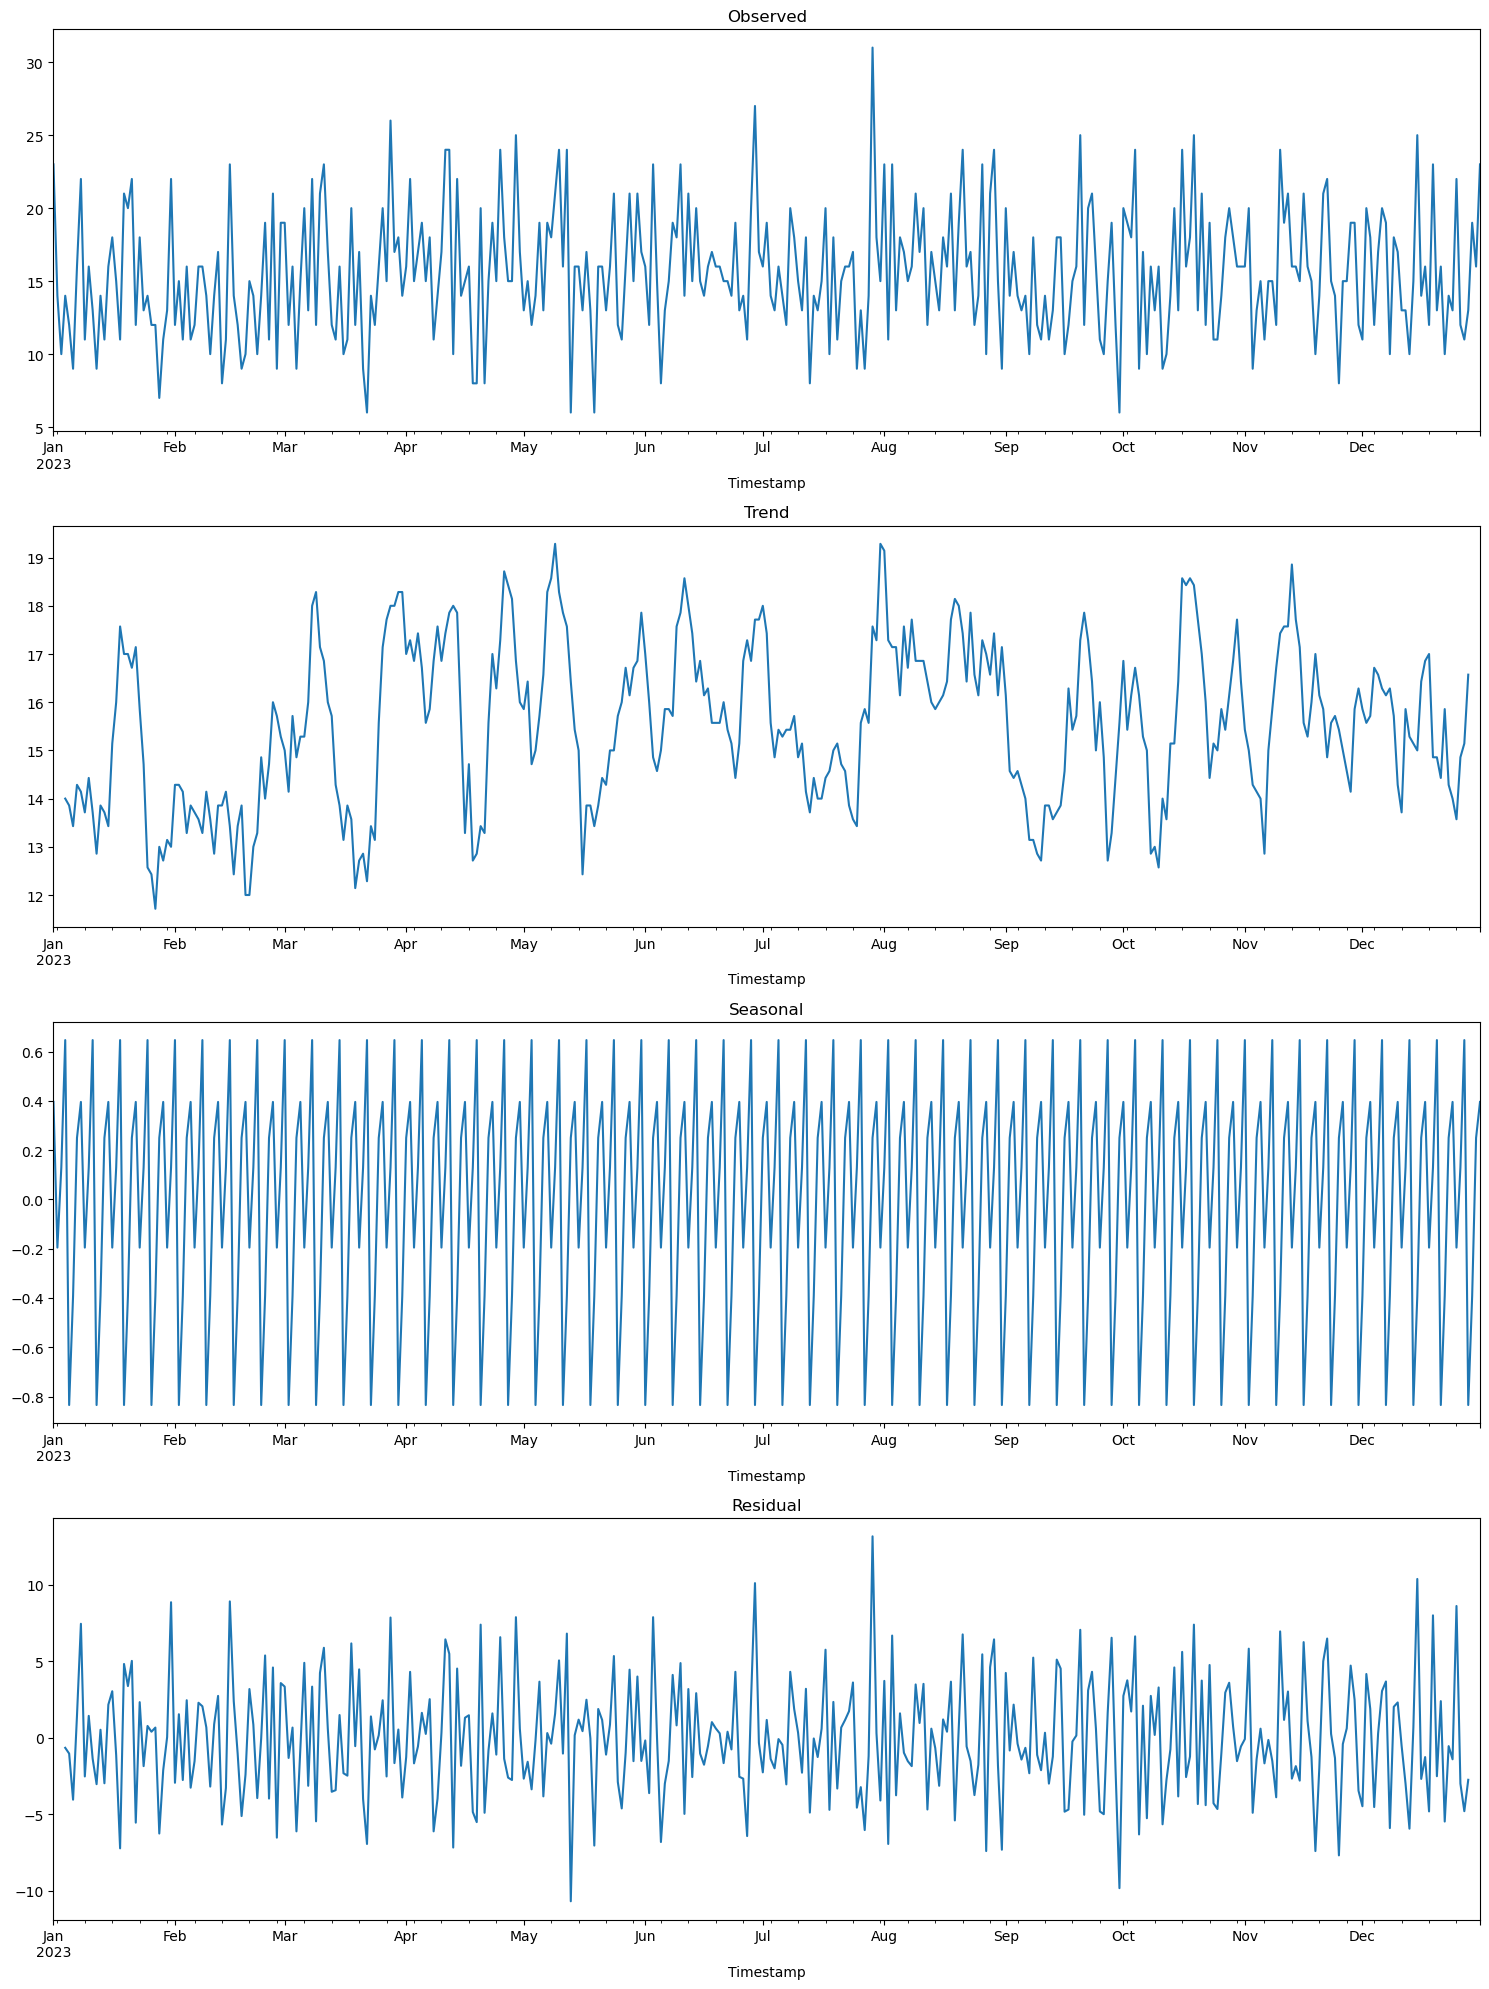

In [335]:
# Decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(daily_fraud, model='additive', period=7)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 20))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

-The overall level of fraud (Observed)

-Any long-term changes in fraud rates (Trend)

-Regular patterns in fraud occurrences (Seasonal)

-Unexpected spikes or dips in fraud (Residual)

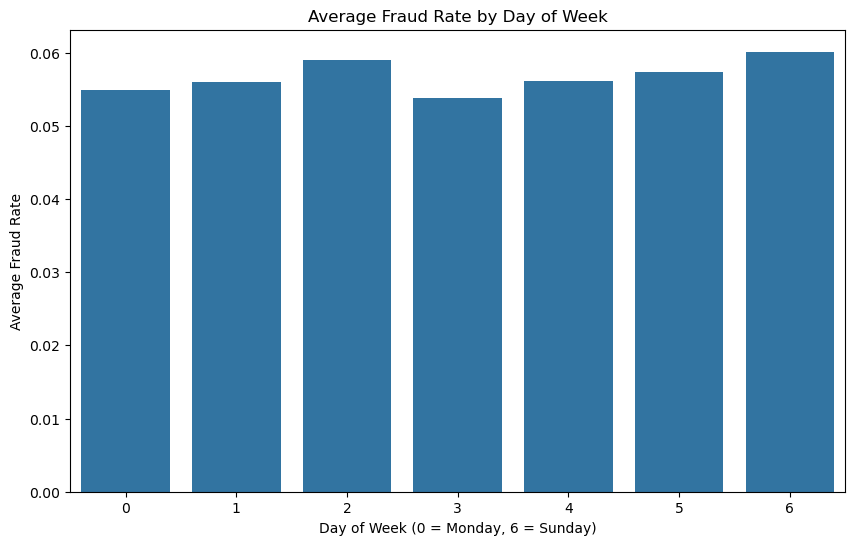

In [336]:
# Analyze fraud by day of week
df['DayOfWeek'] = df.index.dayofweek
fraud_by_day = df.groupby('DayOfWeek')['Fraud'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_by_day.index, y=fraud_by_day.values)
plt.title('Average Fraud Rate by Day of Week')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Average Fraud Rate')
plt.show()

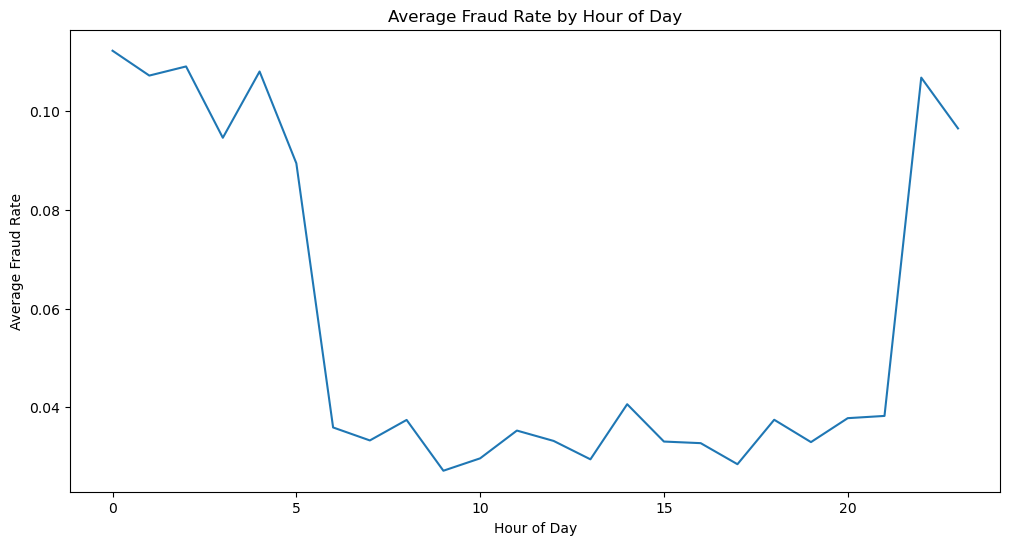

In [337]:
# Analyze fraud by hour of day
df['HourOfDay'] = df.index.hour
fraud_by_hour = df.groupby('HourOfDay')['Fraud'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values)
plt.title('Average Fraud Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fraud Rate')
plt.show()

In [224]:
# Print summary statistics
print("Total number of fraudulent transactions:", df['Fraud'].sum())
print("Average daily fraud occurrences:", daily_fraud.mean())
print("Day with highest fraud occurrences:", daily_fraud.idxmax(), "with", daily_fraud.max(), "frauds")
print("Day with lowest fraud occurrences:", daily_fraud.idxmin(), "with", daily_fraud.min(), "frauds")


Total number of fraudulent transactions: 4853
Average daily fraud occurrences: 13.295890410958904
Day with highest fraud occurrences: 2023-11-17 00:00:00 with 41 frauds
Day with lowest fraud occurrences: 2023-11-23 00:00:00 with 0 frauds


3. Feature Engineering

In [226]:
df = pd.merge(df1, df2, left_on='Sender Account ID', right_on='Customer ID')


In [126]:
df.head()

,Transaction ID,Timestamp,Sender Account,Transaction Type,IN_OUT,Amount,Recipient Bank,Fraud,Date,Customer ID,Name,Age,Location,Gender,Account Type,Device Count
0,T00001,2023-05-20 22:28:00,10035,Payment,Out,7580.39,B0005,0,2023-05-20,10035,Chathura Wijesinghe,75,Matara,Male,Savings,1
1,T00002,2023-06-16 19:29:00,10072,Transfer,In,4946.84,B0008,0,2023-06-16,10072,Rashmi De Alwis,35,Matara,Male,Current,5
2,T00003,2023-06-13 00:45:00,10015,Transfer,Out,2856.89,B0003,0,2023-06-13,10015,Amaya Rajapaksha,39,Ratnapura,Other,Current,4
3,T00004,2023-11-10 23:10:00,10054,Transfer,Out,1047.93,B0007,0,2023-11-10,10054,Anushka Rathnayake,47,Negombo,Female,Current,11
4,T00005,2023-12-14 16:52:00,10062,Credit,Out,4333.85,B0005,0,2023-12-14,10062,Dilini De Alwis,42,Galle,Male,Current,10


In [227]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 1. Time-based features
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

In [228]:
# 2. Amount-based features
df['Amount_Log'] = np.log1p(df['Amount'])
df['Amount_Bin'] = pd.qcut(df['Amount'], q=10, labels=False)

In [230]:
# 3. Customer behavior features
customer_avg_amount = df.groupby('Sender Account ID')['Amount'].mean().reset_index()
customer_avg_amount.columns = ['Sender Account ID', 'Avg_Amount']
df = pd.merge(df, customer_avg_amount, on='Sender Account ID', how='left')
df['Amount_to_Avg_Ratio'] = df['Amount'] / df['Avg_Amount']

transaction_count = df.groupby('Sender Account ID').size().reset_index(name='Transaction_Count')
df = pd.merge(df, transaction_count, on='Sender Account ID', how='left')


In [231]:
# 4. Recency feature
df['Last_Transaction'] = df.groupby('Sender Account ID')['Timestamp'].shift(1)
df['Time_Since_Last_Transaction'] = (df['Timestamp'] - df['Last_Transaction']).dt.total_seconds() / 3600


In [232]:
# 5. Categorical encoding
le = LabelEncoder()
categorical_cols = ['Transaction Type', 'IN_OUT', 'Recipient Bank', 'Account Type', 'Gender', 'Location']
for col in categorical_cols:
    df[col + '_Encoded'] = le.fit_transform(df[col])

In [233]:
# 6. Interaction features
df['Amount_Hour'] = df['Amount'] * df['Hour']
df['Amount_DayOfWeek'] = df['Amount'] * df['DayOfWeek']


In [234]:
# 7. Age-based features
df['Age_Bin'] = pd.cut(df['Age'], bins=[0, 30, 50, 70, 100], labels=[0, 1, 2, 3])


In [235]:
# 8. Device count features
df['High_Device_Count'] = (df['Device Count'] > df['Device Count'].median()).astype(int)


In [236]:
# Prepare features for modeling
features = ['Amount', 'Amount_Log', 'Amount_Bin', 'Hour', 'Day', 'Month', 'DayOfWeek', 'IsWeekend',
            'Avg_Amount', 'Amount_to_Avg_Ratio', 'Transaction_Count', 'Time_Since_Last_Transaction',
            'Amount_Hour', 'Amount_DayOfWeek', 'Age', 'Age_Bin', 'Device Count', 'High_Device_Count'] + \
           [col + '_Encoded' for col in categorical_cols]


In [237]:
X = df[features]
y = df['Fraud']

In [238]:
# Step 1: Handle Missing Values
print("Missing values before imputation:")
print(X.isnull().sum())

Missing values before imputation:
Amount                           0
Amount_Log                       0
Amount_Bin                       0
Hour                             0
Day                              0
Month                            0
DayOfWeek                        0
IsWeekend                        0
Avg_Amount                       0
Amount_to_Avg_Ratio              0
Transaction_Count                0
Time_Since_Last_Transaction    100
Amount_Hour                      0
Amount_DayOfWeek                 0
Age                              0
Age_Bin                          0
Device Count                     0
High_Device_Count                0
Transaction Type_Encoded         0
IN_OUT_Encoded                   0
Recipient Bank_Encoded           0
Account Type_Encoded             0
Gender_Encoded                   0
Location_Encoded                 0
dtype: int64


In [239]:
# Use SimpleImputer to fill missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')  # for numeric columns
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [240]:
print("\nMissing values after imputation:")
print(X_imputed.isnull().sum())


Missing values after imputation:
Amount                         0
Amount_Log                     0
Amount_Bin                     0
Hour                           0
Day                            0
Month                          0
DayOfWeek                      0
IsWeekend                      0
Avg_Amount                     0
Amount_to_Avg_Ratio            0
Transaction_Count              0
Time_Since_Last_Transaction    0
Amount_Hour                    0
Amount_DayOfWeek               0
Age                            0
Age_Bin                        0
Device Count                   0
High_Device_Count              0
Transaction Type_Encoded       0
IN_OUT_Encoded                 0
Recipient Bank_Encoded         0
Account Type_Encoded           0
Gender_Encoded                 0
Location_Encoded               0
dtype: int64


4. Data Preprocessing

In [241]:
# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [242]:
# Step 3: Scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [243]:
# Check class imbalance
print("\nClass distribution before SMOTE:")
print(y_train.value_counts(normalize=True))


Class distribution before SMOTE:
Fraud
0    0.951425
1    0.048575
Name: proportion, dtype: float64


In [244]:
# Step 4: Apply SMOTE to address class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts(normalize=True))


Class distribution after SMOTE:
Fraud
0    0.5
1    0.5
Name: proportion, dtype: float64


5. Variable Auto Encoder Model

In [253]:
# Define the VAE architecture
class VAE(tf.keras.Model):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(input_dim,), dtype=tf.float32),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(latent_dim * 2)
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(latent_dim,), dtype=tf.float32),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(input_dim)
        ])

    def encode(self, x):
        mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
        return mean, logvar

    def reparameterize(self, mean, logvar):
        eps = tf.random.normal(shape=mean.shape)
        return eps * tf.exp(logvar * .5) + mean

    def decode(self, z):
        return self.decoder(z)

    def call(self, x):
        mean, logvar = self.encode(x)
        z = self.reparameterize(mean, logvar)
        x_logit = self.decode(z)
        return x_logit, mean, logvar

In [254]:
# Define the loss function
@tf.function
def vae_loss(x, x_logit, mean, logvar):
    x = tf.cast(x, tf.float32)
    reconstruction_loss = tf.reduce_mean(tf.square(x - x_logit))
    kl_loss = -0.5 * tf.reduce_mean(1 + logvar - tf.square(mean) - tf.exp(logvar))
    return reconstruction_loss + kl_loss

In [255]:
# Create and compile the model
input_dim = X_train_scaled.shape[1]
latent_dim = 2  
vae = VAE(input_dim, latent_dim)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [256]:
# Train the model
@tf.function
def train_step(x):
    x = tf.cast(x, tf.float32)
    with tf.GradientTape() as tape:
        x_logit, mean, logvar = vae(x)
        loss = vae_loss(x, x_logit, mean, logvar)
    gradients = tape.gradient(loss, vae.trainable_variables)
    optimizer.apply_gradients(zip(gradients, vae.trainable_variables))
    return loss

epochs = 50
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices(X_train_smote).shuffle(10000).batch(batch_size)

for epoch in range(epochs):
    total_loss = 0.0
    num_batches = 0
    for step, x_batch in enumerate(train_dataset):
        try:
            loss = train_step(x_batch)
            total_loss += loss
            num_batches += 1
            
            if tf.math.is_nan(loss):
                print(f"NaN loss encountered at epoch {epoch+1}, step {step+1}")
                break
            
            if step % 100 == 0:
                print(f"Epoch {epoch+1}, Step {step+1}, Loss: {loss.numpy():.4f}")
        
        except tf.errors.InvalidArgumentError as e:
            print(f"Error at epoch {epoch+1}, step {step+1}: {str(e)}")
            print(f"Shape of x_batch: {x_batch.shape}, dtype: {x_batch.dtype}")
            raise  # Re-raise the exception to stop execution
    
    if num_batches > 0:
        avg_loss = total_loss / num_batches
        print(f'Epoch {epoch+1}, Average Loss: {avg_loss.numpy():.4f}')
    else:
        print(f'Epoch {epoch+1} had no valid batches.')

print("Training completed.")


2024-10-01 08:05:10.453137: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [152228,24]
	 [[{{node Placeholder/_0}}]]
2024-10-01 08:05:10.453663: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [152228,24]
	 [[{{node Placeholder/_0}}]]


Epoch 1, Step 1, Loss: 1.1852
Epoch 1, Step 101, Loss: 1.0367
Epoch 1, Step 201, Loss: 0.9456
Epoch 1, Step 301, Loss: 1.1025
Epoch 1, Step 401, Loss: 1.0713
Epoch 1, Step 501, Loss: 1.1170
Epoch 1, Step 601, Loss: 1.0502
Epoch 1, Step 701, Loss: 0.9590
Epoch 1, Step 801, Loss: 1.0730
Epoch 1, Step 901, Loss: 0.9964
Epoch 1, Step 1001, Loss: 0.9891
Epoch 1, Step 1101, Loss: 0.9839
Epoch 1, Step 1201, Loss: 1.0177
Epoch 1, Step 1301, Loss: 0.9668
Epoch 1, Step 1401, Loss: 0.9517
Epoch 1, Step 1501, Loss: 0.9248
Epoch 1, Step 1601, Loss: 0.9757
Epoch 1, Step 1701, Loss: 0.9622
Epoch 1, Step 1801, Loss: 0.8836
Epoch 1, Step 1901, Loss: 1.0272
Epoch 1, Step 2001, Loss: 0.8985
Epoch 1, Step 2101, Loss: 0.9590
Epoch 1, Step 2201, Loss: 1.0156
Epoch 1, Step 2301, Loss: 0.9688
Epoch 1, Step 2401, Loss: 0.8681
Epoch 1, Step 2501, Loss: 0.9027
Epoch 1, Step 2601, Loss: 0.9366
Epoch 1, Step 2701, Loss: 0.8896
Epoch 1, Step 2801, Loss: 0.9112
Epoch 1, Step 2901, Loss: 0.9678
Epoch 1, Step 3001, Lo

In [257]:
# Verify model output
sample_input = next(iter(train_dataset))
sample_output, _, _ = vae(sample_input)
print(f"Sample input shape: {sample_input.shape}")
print(f"Sample output shape: {sample_output.shape}")
print(f"Sample input dtype: {sample_input.dtype}")
print(f"Sample output dtype: {sample_output.dtype}")

Sample input shape: (32, 24)
Sample output shape: (32, 24)
Sample input dtype: <dtype: 'float64'>
Sample output dtype: <dtype: 'float32'>


In [258]:
# Calculate reconstruction error for anomaly detection
@tf.function
def calculate_reconstruction_error(x):
    x = tf.cast(x, tf.float32)
    x_logit, _, _ = vae(x)
    return tf.reduce_mean(tf.square(x - x_logit), axis=1)

reconstruction_errors = calculate_reconstruction_error(tf.constant(X_test_scaled)).numpy()

# Determine the threshold for anomaly detection
threshold = np.percentile(reconstruction_errors, 95)  # You can adjust this percentile

# Identify anomalies
anomalies = reconstruction_errors > threshold


Anomaly Detection Performance:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     19033
           1       0.04      0.04      0.04       967

    accuracy                           0.91     20000
   macro avg       0.49      0.49      0.49     20000
weighted avg       0.91      0.91      0.91     20000



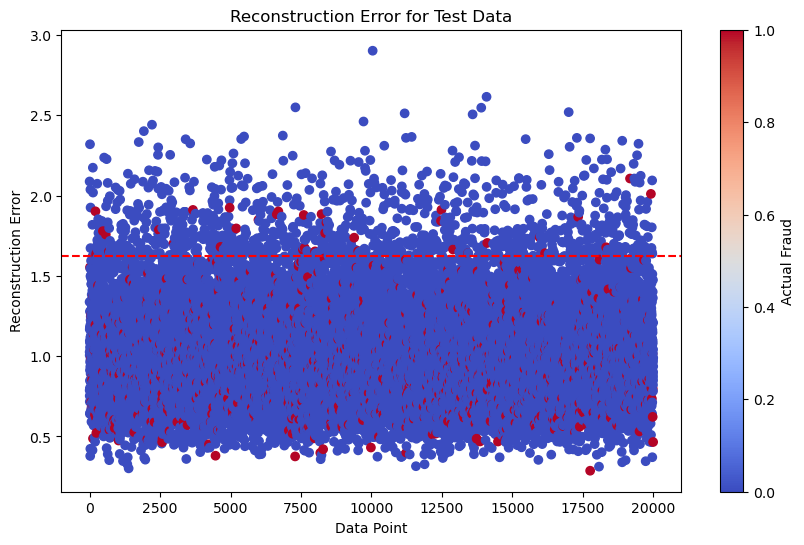

In [259]:
# Evaluate the anomaly detection performance
from sklearn.metrics import classification_report, confusion_matrix

print("Anomaly Detection Performance:")
print(classification_report(y_test, anomalies))

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(range(len(reconstruction_errors)), reconstruction_errors, c=y_test, cmap='coolwarm')
plt.axhline(y=threshold, color='r', linestyle='--')
plt.title('Reconstruction Error for Test Data')
plt.xlabel('Data Point')
plt.ylabel('Reconstruction Error')
plt.colorbar(label='Actual Fraud')
plt.show()

Logistic Regression model

In [260]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

In [261]:
# Make predictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]


In [262]:
# Evaluate the model
print("Logistic Regression Results:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\nROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")


Logistic Regression Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.67      0.79     19033
           1       0.10      0.71      0.17       967

    accuracy                           0.67     20000
   macro avg       0.54      0.69      0.48     20000
weighted avg       0.94      0.67      0.76     20000


Confusion Matrix:
[[12682  6351]
 [  280   687]]

ROC AUC Score: 0.7555


In [263]:
# Cross-validation
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"\nCross-validation ROC AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")




Cross-validation ROC AUC: 0.7516 (+/- 0.0115)


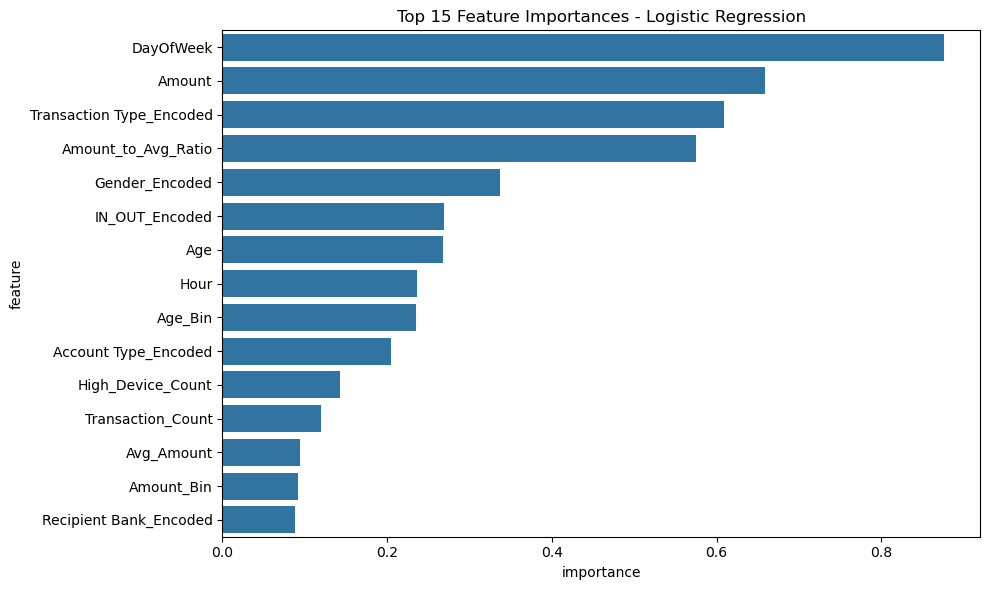

In [264]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(log_reg.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importances - Logistic Regression')
plt.tight_layout()
plt.show()


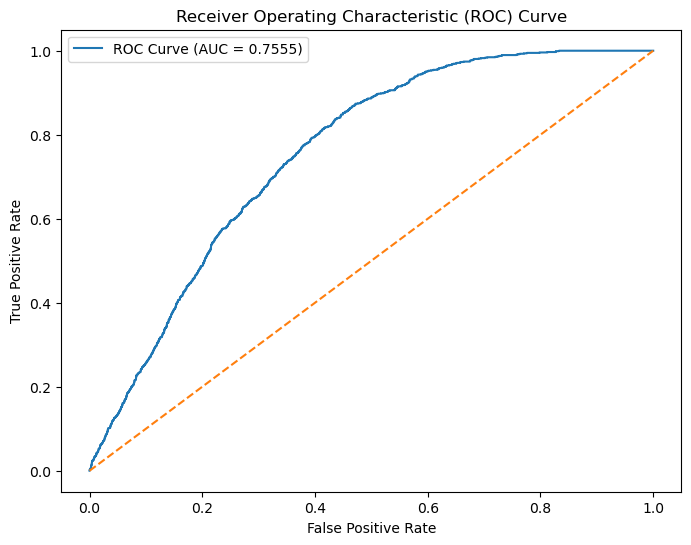

In [265]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

SVM Model

In [266]:
# Train SVM model
svm_model = SVC(kernel='rbf', C=1.0, class_weight='balanced', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

In [267]:
# Make predictions
y_pred = svm_model.predict(X_test_scaled)
y_pred_proba = svm_model.predict_proba(X_test_scaled)[:, 1]


In [268]:
# Evaluate the model
print("SVM Results:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\nROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

SVM Results:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90     19033
           1       0.21      0.97      0.34       967

    accuracy                           0.82     20000
   macro avg       0.60      0.89      0.62     20000
weighted avg       0.96      0.82      0.87     20000


Confusion Matrix:
[[15490  3543]
 [   29   938]]

ROC AUC Score: 0.9297


In [269]:
# Cross-validation
cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"\nCross-validation ROC AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")



Cross-validation ROC AUC: 0.9271 (+/- 0.0063)


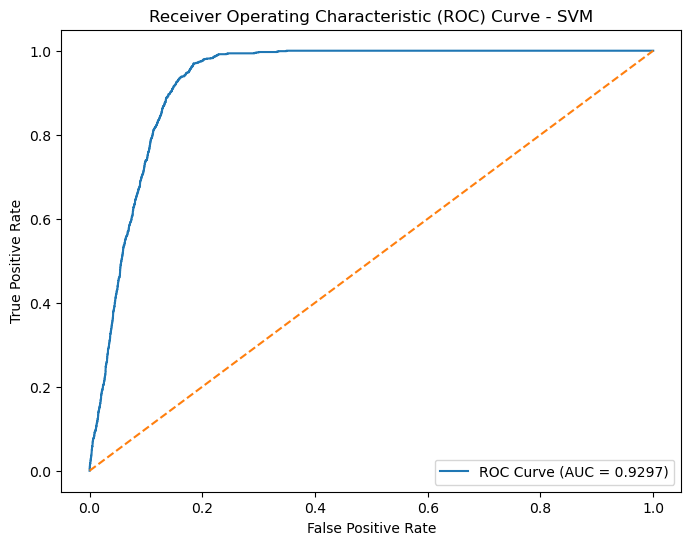

In [270]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend()
plt.show()

Ensemble Model

In [271]:
# Define base models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

lr_model = LogisticRegression(class_weight='balanced', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, 
                          scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]),
                          random_state=42)
svm_model = SVC(kernel='rbf', C=1.0, class_weight='balanced', probability=True, random_state=42)


In [272]:
# Create the ensemble model
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(
    estimators=[
        ('lr', lr_model),
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('svm', svm_model)
    ],
    voting='soft'  # Use probability predictions for voting
)


In [273]:
# Train the ensemble model
ensemble_model.fit(X_train_scaled, y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(class_weight='balanced',
                                                 random_state=42)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categ...
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('svm',
                              SVC(class_weight='balanced', probability=True,
                                  random_state=42))],
                 voting='soft')

In [274]:
# Make predictions
y_pred = ensemble_model.predict(X_test_scaled)
y_pred_proba = ensemble_model.predict_proba(X_test_scaled)[:, 1]


In [275]:
# Evaluate the model
print("Ensemble Model Results:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\nROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")


Ensemble Model Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     19033
           1       0.40      0.47      0.43       967

    accuracy                           0.94     20000
   macro avg       0.69      0.72      0.70     20000
weighted avg       0.94      0.94      0.94     20000


Confusion Matrix:
[[18355   678]
 [  516   451]]

ROC AUC Score: 0.9614


In [276]:
# Cross-validation
cv_scores = cross_val_score(ensemble_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"\nCross-validation ROC AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")



Cross-validation ROC AUC: 0.9598 (+/- 0.0034)


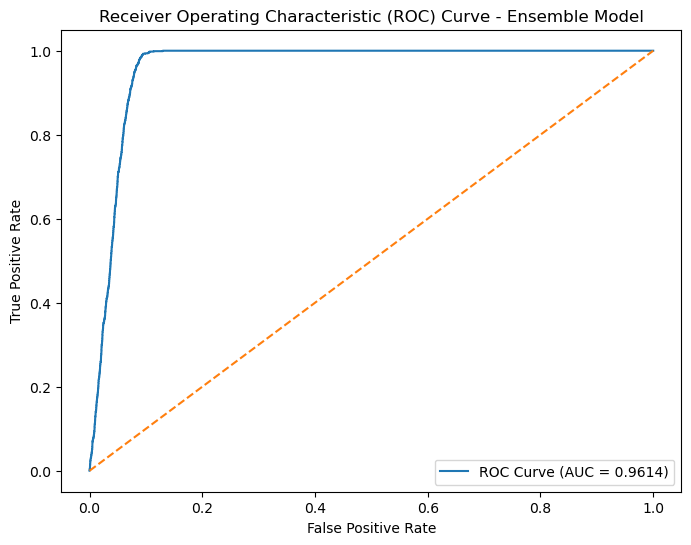

In [277]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Ensemble Model')
plt.legend()
plt.show()

In [278]:
# Compare ROC curves for all models
plt.figure(figsize=(10, 8))


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

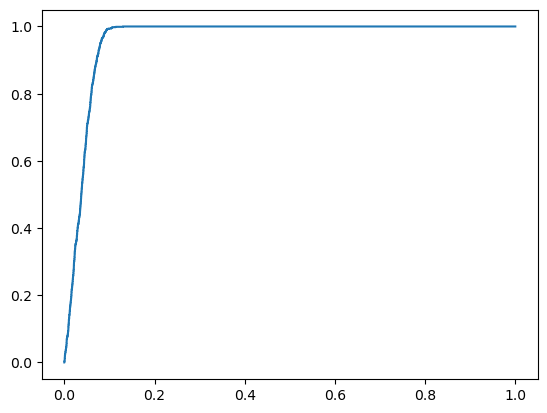

In [279]:
# Ensemble
plt.plot(fpr, tpr, label=f'Ensemble (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})')


KeyboardInterrupt: 

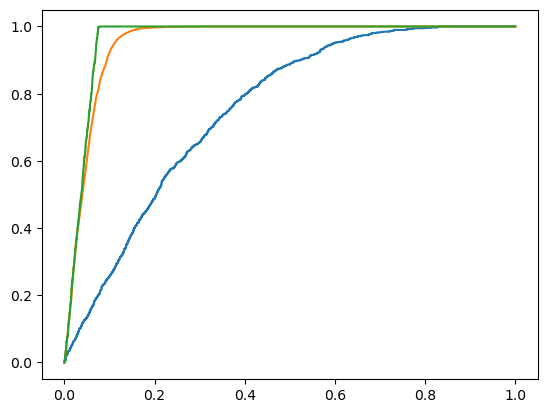

In [280]:
# Individual models
for name, model in [('LR', lr_model), ('RF', rf_model), ('XGB', xgb_model), ('SVM', svm_model)]:
    model.fit(X_train_scaled, y_train)
    y_pred_proba_ind = model.predict_proba(X_test_scaled)[:, 1]
    fpr_ind, tpr_ind, _ = roc_curve(y_test, y_pred_proba_ind)
    plt.plot(fpr_ind, tpr_ind, label=f'{name} (AUC = {roc_auc_score(y_test, y_pred_proba_ind):.4f})')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Ensemble vs Individual Models')
plt.legend()
plt.show()